# Analysis of CMIP6, ERA5, and CloudSat

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore') # don't output warnings

# import packages
import xarray as xr
from glob import glob
import cartopy.crs as ccrs
import cartopy as cy
import numpy as np

import matplotlib.pyplot as plt
from cmcrameri import cm


In [2]:
# reload imports
%load_ext autoreload
%autoreload 2

In [3]:
variable_id = [
               # ['prsn', 'sf'],
               ['clivi', 'tciw']
            #    ['lwp', 'tclw'],
               # ['tas', '2t']
               ]

In [4]:
cmip_file = '/scratch/franzihe/output/CMIP6_hist/1deg/{}_season_1deg_1985_2014.nc'.format(variable_id[0][0])

In [5]:
era_file = '/scratch/franzihe/output/ERA5/monthly_means/1deg/{}_season_1deg_1985_2014.nc'.format(variable_id[0][1])

In [7]:
# Read in datasets 
cmip = xr.open_dataset(cmip_file)
era = xr.open_dataset(era_file)

In [8]:
if variable_id[0][0] ==  'prsn':
    # kg m-2 s-1 to mm/day *86400
    prsn = cmip[variable_id[0][0]]*86400

    # m of water equivalent can be converted to kgm^2/day or mm/day by multiplying by 1000.
    sf = era[variable_id[0][1]]*1000


if variable_id[0][0] == 'clivi' or variable_id[0][0] == 'lwp':
    # convert from kg m-2 to g m-2
    prsn = cmip[variable_id[0][0]]*1000
    sf  = era[variable_id[0][1]]*1000


if variable_id[0][0] == 'tas':
    prsn = cmip[variable_id[0][0]]
    sf = era[variable_id[0][1]]

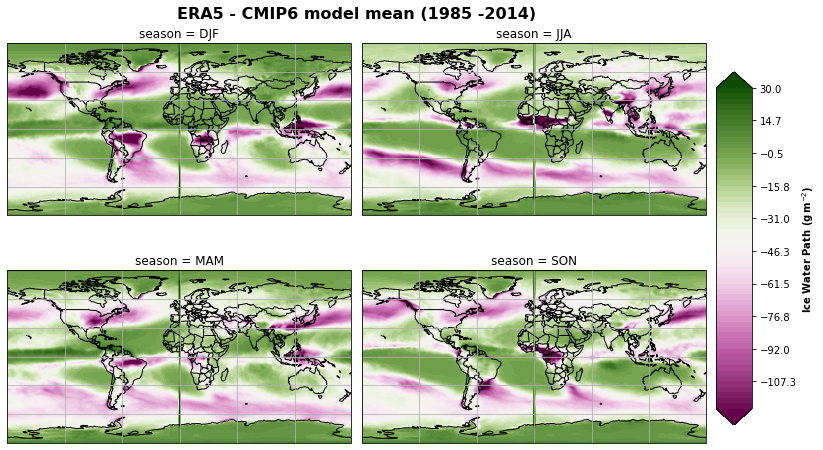

In [15]:
fig, axsm = plt.subplots(2,2, 
                         figsize=[10,7], 
                         subplot_kw={'projection':ccrs.PlateCarree()})
fig.suptitle('ERA5 - CMIP6 model mean (1985 -2014)', fontsize=16, fontweight="bold")

axs = axsm.flatten()
for ax, i in zip(axs, prsn.season):
    if variable_id[0][0] == 'prsn':
        im = (sf-prsn).sel(season = i).plot.contourf(ax=ax, 
                                        transform=ccrs.PlateCarree(), 
                                        cmap=cm.bam,
                                        robust=True,
                                        vmin = -.6, vmax=.6,
                                        levels = 30,
                                        add_colorbar = False,
                                        extend = 'both')
    if variable_id[0][0] == 'clivi':
        im = (sf-prsn).sel(season = i).plot.contourf(ax=ax, 
                                        transform=ccrs.PlateCarree(), 
                                        cmap=cm.bam,
                                        robust=True,
                                        vmin = -120, vmax=30,
                                        levels = 60,
                                        add_colorbar = False,
                                        extend = 'both')

    if  variable_id[0][0] == 'lwp':
        im = (sf-prsn).sel(season = i).plot.contourf(ax=ax, 
                                        transform=ccrs.PlateCarree(), 
                                        cmap=cm.bam,
                                        robust=True,
                                        vmin = -30, vmax=30,
                                        levels = 60,
                                        add_colorbar = False,
                                        extend = 'both')

    if variable_id[0][0] == 'tas':
        im = (sf-prsn).sel(season = i).plot.contourf(ax=ax, 
                                        transform=ccrs.PlateCarree(), 
                                        cmap=cm.bam,
                                        robust=True,
                                        vmin = -30, vmax=30,
                                        levels = 60,
                                        add_colorbar = False,
                                        extend = 'both')

    ax.coastlines()
    gl = ax.gridlines()
    ax.add_feature(cy.feature.BORDERS);
    gl.top_labels = False

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
cb = fig.colorbar(im, cax=cbar_ax, orientation="vertical", fraction=0.046, pad=0.04)

if variable_id[0][0] == 'prsn':
    cb.set_label(label='Snowfall (mm$\,$day$^{-1}$)', weight='bold') 
elif variable_id[0][0] == 'clivi':
    cb.set_label(label='Ice Water Path (g$\,$m$^{-2}$)', weight='bold')
elif variable_id[0][0] == 'lwp':
    cb.set_label(label='Liquid Water Path (g$\,$m$^{-2}$)', weight='bold')
elif variable_id[0][0] == 'tas':
    cb.set_label(label='2-m temperature (K)', weight='bold')


plt.tight_layout()
fig.subplots_adjust(top=1)

# save figure to png
figdir = '/uio/kant/geo-metos-u1/franzihe/Documents/Figures/CMIP6_ERA5_CloudSat/'
figname = '{}_season_1deg_1985_2014.png'.format(variable_id[0][0], )
plt.savefig(figdir + figname, format = 'png', bbox_inches = 'tight', transparent = False)